In [67]:
from quchem.Hamiltonian_Generator_Functions import *
from quchem.Graph import *
### HAMILTONIAN start
Molecule = 'H2'#'LiH'
geometry = [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]#[('Li', (0., 0., 0.)), ('H', (0., 0., 1.45))]
num_shots = 10000
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')
### HAMILTONIAN end

#####################################

Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'
anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)
anti_commuting_sets

Building Graph Edges: 100%|##########| 631/631 [00:17<00:00, 36.35it/s] 


{0: [(0.07823637778985221+0j) [Z6 Z7]],
 1: [(-4.087119674570699+0j) []],
 2: [(0.0782363777898523+0j) [Z8 Z9]],
 3: [(-0.22781796302889+0j) [Z6],
  (-0.004217284878422747+0j) [X6 X7 Y8 Y9],
  (0.0024550578367610178+0j) [Y0 X1 X6 Y7],
  (0.0019065797888500528+0j) [Y1 X2 X6 Y7],
  (0.0025595117802951245+0j) [Y1 Z2 Z3 X4 X6 Y7],
  (0.0014751106104476754+0j) [Y1 Z2 Z3 Z4 Z5 Y6 X7 Z8 Z9 X10]],
 4: [(-0.22781796302889018+0j) [Z9],
  (0.004217284878422747+0j) [X6 Y7 Y8 X9],
  (-0.0048213900012315965+0j) [Y8 Y9 X10 X11],
  (0.0048588716929696555+0j) [X2 Z3 Z4 Z5 Z6 Z7 X8 X9 Z10 X11],
  (0.0034750158150631577+0j) [X4 Z5 Z6 Z7 X8 X9 Z10 X11],
  (-0.0014751106104476765+0j) [X0 Z1 Z2 Z3 Z4 Z5 Z6 Z7 X8 X9 Z10 X11]],
 5: [(-0.22781796302889018+0j) [Z8],
  (0.004217284878422747+0j) [Y6 X7 X8 Y9],
  (0.0025595117802951262+0j) [Y0 Z1 Z2 Z3 Z4 Y5 X8 X9],
  (-0.010337447912440538+0j) [Y4 Y5 X8 X9],
  (0.003475015815063158+0j) [X5 Z6 Z7 Y8 Y9 X10],
  (-0.004797924342406351+0j) [Y2 Z3 Z4 Y5 X8 X9]],
 6: [

The Hamiltonian is a sum of $m$ PauliWords:

$$H=\sum_{j=0}^{m-1} \alpha_{j} P_{j}$$

In this there are $l$ completely anti-commuting sets, denoted as $H_{S_{l}}$:


$$H =\sum_{l} H_{S_{l}}$$

where each anti-commuting set is defined as:

$$H_{S_{l}}=\sum_{P_{j} \in S_{l}} \alpha_{j} P_{j}$$

where:
- $\left\{P_{j}, P_{k}\right\}=0$ for $\forall P_{j} \neq P_{k} \in S_{l}$


We want **want** the sum of the squares of the cofactors to be 1:

$$H_{S_{l}}=\sum_{P_{j} \in S_{l}} \alpha_{j} P_{j}=\gamma_{l} \sum_{P_{j} \in S_{l}} \beta_{j} P_{j}$$

- aka: $\sum_{j} \beta_{j}^{2}=1$
- and $\gamma_{l}$ is the correction factor: $\alpha_{j} =  \gamma_{l} \beta_{j}$

SO overall we can turn our Hamiltonian into $l$ anti_commutings sets as:

$$H=\sum_{l} H_{S_{l}} = \sum_{l} \sum_{\substack{j=0 \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \alpha_{j} P_{j}= \sum_{l} \gamma_{l} \sum_{\substack{j=0 \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \beta_{j} P_{j}$$

We will focus on looking at just one anti-commuting set

$$H_{S_{l}}=\sum_{P_{j} \in S_{l}} \alpha_{j} P_{j}=\gamma_{l} \sum_{P_{j} \in S_{l}} \beta_{j} P_{j}$$

////////////////

1. re-write set $H_{S_{l}}$ ($=\gamma_{l} \sum_{P_{j} \in S_{l}} \beta_{j} P_{j}$) with $\beta_{n} P_{n}$ outside sum :


$$H_{S_{l}}= \gamma_{l} \beta_{n} P_{n} +  \gamma_{l} \sum_{\substack{j \neq n \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \beta_{j} P_{j}$$

- $\sum_{j} \beta_{j}^{2}=1$
- $\alpha_{j} =  \gamma_{l} \beta_{j}$

$$\frac{H_{S_{l}}}{\gamma_{l}}=  \beta_{n} P_{n} +  \sum_{\substack{j \neq n \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \beta_{j} P_{j}$$


2. The definition of $H_{n-1}$ is:

$$H_{n-1}=\sum_{k=1}^{n-1} \delta_{k} P_{k}$$

where: $\sum_{k=1}^{n-1} \delta_{k}^{2}=1$

therefore using what we obtained in step 1:

$$\frac{H_{S_{l}}}{\gamma_{l}}=  \beta_{n} P_{n} +  \Omega_{l} \sum_{\substack{j \neq n \\  P_{j} \in S_{l}}}^{|S_{l}|-1} \delta_{j} P_{j}$$

where:
- $\sum_{j} \delta_{j}^{2}=1$
- $\beta_{j} =  \Omega_{l} \delta_{j}$


3.

$$\frac{H_{S_{l}}}{\gamma_{l}}=  \beta_{n} P_{n} +  \Omega_{l} H_{n-1}$$

$H_{n}$ is defined as:

$$H_{n}=\cos \phi_{n-1} P_{n}+\sin \phi_{n-1} H_{n-1}$$

Using what we have from step 3:

$$\cos \phi_{n-1}= {\beta_{n}} $$

OR

$$\sin \phi_{n-1}= {\Omega_{l}} $$

# Question ^^^ which one of these?

doesn't matter as 

$$\beta_{n}^{2} + {\Omega_{l}}^{2} = 1 $$

In [ ]:
# wrong

# can also do:

# (starting from step 3)

# $$\frac{H_{S_{l}}}{\gamma_{l}}=  \beta_{n} P_{n} +  \Omega_{l} H_{n-1}$$

# $$\frac{H_{S_{l}}}{\gamma_{l}\Omega_{l}}=  \frac{\beta_{n}}{\Omega_{l}} P_{n} +   H_{n-1}$$

# THEN

# $$\cos \phi_{n-1}= \frac{\beta_{n}}{\Omega_{l}} $$

# OR

# $$\sin \phi_{n-1}= 1 $$


##  Hn set

using
$$\frac{H_{S_{l}}}{\gamma_{l}}=  \beta_{n} P_{n} +  \Omega_{l} H_{n-1} = H_{n}$$

where

$$\cos \phi_{n-1}= {\beta_{n}} $$

## Step 1 getting X

In [ ]:
anti_commuting_sets[7]

NOW

$\mathcal{X}$ is defined as:

$$\begin{aligned} \mathcal{X} &=\frac{i}{2}\left[H_{n-1}, P_{n}\right] \\ &=\frac{i}{2} \sum_{k=1}^{n-1} \delta_{k}\left[P_{k}, P_{n}\right] \\ &=i \sum_{k=1}^{n-1} \delta_{k} P_{k} P_{n} \\ &=i \sum_{k=1}^{n-1} \delta_{k} P_{kn} \end{aligned}$$

where:
- $H_{n-1}=\sum_{k=1}^{n-1} \delta_{k} P_{k}$
- $\sum_{k=1}^{n-1} \delta_{k}^{2}=1$

In [3]:
from quchem.Unitary_partitioning import *

# anti_commutator!
def Get_X_SET(anti_commuting_set, N_index):
    """
    X = i ( ∑_{k=1}^{n-1} B_{k} P_{k} ) P_{n}

    X =  i( ∑_{k=1}^{n-1} B_{k} P_{kn}

        where P_{ks} = P_{k} * P_{n}

    note ∑_{k=1}^{n-1} B_{k}^{2} = 1

    therefore have:
    X =  gamma_l * i( ∑_{k=1}^{n-1} B_{k} P_{kn}


    Args:
        anti_commuting_set (list):
        S_index (int):
        no_qubits (int):
    Returns:
        LCU_dict (dict): A dictionary containing the linear combination of terms required to perform R ('R_LCU')
                         the correction fsinactors to make all real and positive ('LCU_correction')
                         the angle to perform R gate ('alpha')
                         the PauliS term ('P_s')
     """

    
    # 𝛾_𝑙 ∑ 𝛽_𝑗 𝑃_𝑗
    normalised_FULL_set = Get_beta_j_cofactors(anti_commuting_set)
    gamma_l = normalised_FULL_set['gamma_l']
    
    norm_FULL_set = normalised_FULL_set['PauliWords'].copy()
    
    # 𝛽_n 𝑃_n
    qubitOp_Pn_beta_n = norm_FULL_set.pop(N_index)
    
    
    # Ω_𝑙 ∑ 𝛿_𝑗 𝑃_𝑗  ... note this doesn't contain 𝛽_n 𝑃_n
    H_n_1 = Get_beta_j_cofactors(norm_FULL_set) 
    Omega_l = H_n_1['gamma_l']
    
    # cos(𝜙_{𝑛−1}) =𝛽_𝑛
    phi_n_1 = np.arccos(list(qubitOp_Pn_beta_n.terms.values())[0]) 
#     phi_n_1 = np.arcsin(Omega_l)

    # require sine(𝜙_{𝑛−1}) to be positive... Hence if phi_n_1 is in T part of CAST diagram... need to add pi/2 
    # to brind into S part of CAST diagram (ensuring the sign term is posivite)
#     print(phi_n_1*360/(2*np.pi), list(qubitOp_Pn_beta_n.terms.values())[0])
    
    if (phi_n_1 > np.pi):
        # ^ as sin phi_n_1 must be positive phi_n_1 CANNOT be larger than 180 degrees!
        phi_n_1 = 2*np.pi - phi_n_1
        print('correct quadrant found!!!')
    
    
#     print(np.arcsin(Omega_l)*360/(2*np.pi))
#     print('checking sine term: ', np.sin(phi_n_1))
#     print('checking cos term: ', np.cos(phi_n_1))
    
    # 𝑖 ∑ 𝛿_{𝑘} 𝑃_{𝑘𝑛}
    Pn = QubitOperator(list(qubitOp_Pn_beta_n.terms.keys())[0], 1)
    
    X_set={}
    X_set['X_PauliWords'] =[]
    for qubitOp_Pk in H_n_1['PauliWords']:
        new_PauliWord= qubitOp_Pk * Pn *1j
        X_set['X_PauliWords'].append(new_PauliWord)
        

    if not np.isclose(sum(np.absolute(list(qubitOp.terms.values())[0])**2 for qubitOp in X_set['X_PauliWords']), 1):
        raise ValueError('normalisation of X operator incorrect: {}'.format(sum(list(qubitOp.terms.values())[0]**2 for qubitOp in X_set['X_PauliWords'])))

    # THIS IS NOT NEED BUT I AM USING TO CHECK
    X_set['H_n'] = norm_FULL_set + [qubitOp_Pn_beta_n]
#     X_set['H_n'] = [QubitOperator(qubitOp, const*np.sin(phi_n_1)) 
#           for operator in H_n_1['PauliWords'] for qubitOp, const in operator.terms.items()]+ [QubitOperator(list(qubitOp_Pn_beta_n.terms.keys())[0], np.cos(phi_n_1))]

    if not np.isclose(sum(np.absolute(list(qubitOp.terms.values())[0])**2 for qubitOp in X_set['H_n']), 1):
        raise ValueError('normalisation of H_n operator incorrect: {}'.format(sum(np.absolute(list(qubitOp.terms.values())[0])**2 for qubitOp in X_set['H_n'])))
    # THIS IS NOT NEED BUT I AM USING TO CHECK

    if not np.isclose((list(qubitOp_Pn_beta_n.terms.values())[0]**2 + Omega_l**2), 1):
        raise ValueError('Ω^2 + 𝛽n^2 does NOT equal 1')


    X_set['gamma_l'] = gamma_l
    
    X_set['P_n'] = Pn

    
    X_set['H_n_1'] = H_n_1['PauliWords']
    X_set['Omega_l'] = Omega_l
    X_set['phi_n_1'] = phi_n_1
    return X_set

In [4]:
Get_X_SET(anti_commuting_sets[7], 1)

{'X_PauliWords': [(-1+0j) [Y0 Y1 X2 Y3]],
 'H_n': [(0.9668047296891765+0j) [Z1], (0.25551636865500055+0j) [Y0 X1 X2 Y3]],
 'gamma_l': (0.17729829109248613+0j),
 'P_n': 1 [Y0 X1 X2 Y3],
 'H_n_1': [(1+0j) [Z1]],
 'Omega_l': (0.9668047296891765+0j),
 'phi_n_1': (1.3124145630640958-0j)}

$$H_{n}= \sin \phi_{n-1} H_{n-1} + \cos \phi_{n-1} P_{n}$$

In [5]:
Get_beta_j_cofactors(anti_commuting_sets[7])

{'PauliWords': [(0.9668047296891765+0j) [Z1],
  (0.25551636865500055+0j) [Y0 X1 X2 Y3]],
 'gamma_l': (0.17729829109248613+0j)}

In [6]:
test = Get_X_SET(anti_commuting_sets[10], 1)

print('')

print(test['H_n'])
print('should equal')
print(np.sin(test['phi_n_1']), '*',test['H_n_1'],' + ', np.cos(test['phi_n_1']),  '*',test['P_n'])


[(0.9668047296891765+0j) [Z0], (-0.25551636865500044+0j) [X0 X1 Y2 Y3]]
should equal
(0.9668047296891766+0j) * [(1+0j) [Z0]]  +  (-0.2555163686550005+0j) * 1 [X0 X1 Y2 Y3]


In [7]:
test['X_PauliWords']

[(-1+0j) [Y0 X1 Y2 Y3]]

In [8]:
OP1 = QubitOperator('Z3',1)
OP2 = QubitOperator('X0 X1 Y2 Y3',1)
print(-OP1*OP2*1j)
print(-OP2*OP1*1j)

(-1+0j) [X0 X1 Y2 X3]
(1-0j) [X0 X1 Y2 X3]


In [9]:
np.arcsin(0.2555)*360/(2*np.pi)

14.803214510968486

In [ ]:
anti_commuting_sets

Now $\mathcal{X}$ acts on $H_{n}$ as follows:

$$\mathcal{X} H_{n}=i\left(-\sin \phi_{n-1} P_{n}+\cos \phi_{n-1} H_{n-1}\right)$$

where:
- $H_{n}=\sin \phi_{n-1} H_{n-1}+\cos \phi_{n-1} P_{n}$

remember:

- $H_{n}=\frac{H_{S}}{\gamma_{l}}= \beta_{n} P_{n} + \Omega_{l} H_{n-1}$... which defines what $\phi_{n-1}$ is!


We let:
$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}-i \sin (\alpha / 2) \mathcal{X}$$

then the following:
$$R H_{n} R^{\dagger}=\sin \left(\phi_{n-1}-\alpha\right) H_{n-1}+\cos \left(\phi_{n-1}-\alpha\right) P_{n}$$

by **choosing**: $\alpha=\phi_{n-1}$
we get:

$$R H_{n} R^{\dagger}=P_{n}$$

- note $\alpha = arccos(\beta_{n})$ 

overall we want **$$ H_{n} = R^{\dagger} P_{n} R$$**

To do this via a **quantum circuit** we do the following:

$$ \langle H_{n}\rangle =  \langle \psi_{UCCSD}|R^{\dagger} P_{n} R |\psi_{UCCSD}\rangle = M_{z} U_{n}R|\psi_{UCCSD}\rangle$$ 

where:
- $ U_{n}$ is a change of basis of $P_{n}$ to $Z$ basis for measurement!
- $M_{z}$ is a measurement in $Z$ basis resuliting in: $ \langle \psi_{UCCSD}|R^{\dagger} U_{n}^{\dagger} M_{z}^{\dagger} M_{z} U_{n}R|\psi_{UCCSD}\rangle$


NOW!
let us take a closer look at:
$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}-i \sin (\alpha / 2) \mathcal{X}$$

this is just a **LINEAR COMBINATION OF PAULIWORDS!**

- $\mathcal{X}=i \sum_{k=0}^{n-1} \delta_{k} P_{kn}$ (index starts at 0 with identity term included!)

$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}-i \sin (\alpha / 2) \bigg( i \sum_{k=1}^{n-1} \delta_{k} P_{kn}\bigg)$$

my code has $\bigg( i \sum_{k=1}^{n-1} \delta_{k} P_{kn}\bigg)$ in code!

(could simplify too: [not doing atm])
$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}+ \sin (\alpha / 2) \bigg( \sum_{k=1}^{n-1} \delta_{k} P_{kn}\bigg)$$

In [10]:
def Get_R_linear_combination(anti_commuting_set, N_index):
    """
    """
    X_set = Get_X_SET(anti_commuting_set, N_index)
    
    # χ = 𝑖 ∑ 𝛿_𝑘 𝑃_𝑘𝑛
    X_terms = X_set['X_PauliWords']
    
    # 𝛼 = 𝜙_{𝑛−1}
    alpha = X_set['phi_n_1']
    
#     if (np.cos(alpha)<0) and (np.cos(alpha/2)>0):
#         alpha = 2*np.pi - alpha
    
    
    # 𝑅=cos(𝛼/2)𝟙−𝑖sin(𝛼/2)χ = cos(𝛼/2)𝟙−𝑖sin(𝛼/2)*(𝑖 ∑ 𝛿_𝑘 𝑃_𝑘𝑛)
    
    # cos(𝛼/2)𝟙 term
    I_term = QubitOperator('', np.cos(alpha / 2))
    R_linear_comb_list = [I_term]
    
    # −𝑖 sin(𝛼/2) * (𝑖 ∑ 𝛿_𝑘 𝑃_𝑘𝑛) terms!
    sin_term = np.sin(alpha / 2)*1j
    for qubitOp_P_kn in X_terms:
        for P_kn_word, constant in qubitOp_P_kn.terms.items():
            
            new_constant = sin_term*constant
            R_linear_comb_list.append(QubitOperator(P_kn_word, new_constant))
    
    if not np.isclose(sum(np.absolute(list(qubitOp.terms.values())[0])**2 for qubitOp in R_linear_comb_list), 1):
        raise ValueError('normalisation of R operator incorrect: {}'.format(sum(list(qubitOp.terms.values())[0]**2 for qubitOp in R_linear_comb_list)))

    
    return R_linear_comb_list, X_set['P_n'], X_set['gamma_l'] #, X_set['Omega_l']

In [11]:
anti_commuting_sets[7]

[(0.171412826394024+0j) [Z1], (0.04530261550868928+0j) [Y0 X1 X2 Y3]]

In [12]:
Get_R_linear_combination(anti_commuting_sets[7], 0)

([(0.9916664584650366+0j) [], 0.12883180956352255j [Y0 Y1 X2 Y3]],
 1 [Z1],
 (0.17729829109248613+0j))

## linear combination of unitaries method!

https://arxiv.org/pdf/1610.06546.pdf

- for any operator $\hat{O}$ that is a sum of **unitary** operators $\hat{U}_{j}$:

$$\hat{O}=\sum_{j=1}^{d} \alpha_{j} \hat{U}_{j}$$

- where $\|\hat{O}\| \leq\|\vec{\alpha}\|_{1}=\sum_{j=1}^{d}\left|\alpha_{j}\right|$

and

- **IMPORTANT** $\forall \alpha_{j}$ we have  $\alpha_{j} \geq 0$ AKA absorbing complex phases into $\hat{U}_{j}$

If we define the following:

$$\hat{U}=\sum_{j=1}^{d}|j\rangle\left\langle\left. j\right|_{a} \otimes \hat{U}_{j}\right.$$

$$\hat{G}=\sum_{j=1}^{d} \sqrt{\frac{\alpha_{j}}{\|\vec{\alpha}\|_{1}}}|j\rangle\left\langle\left. 0\right|_{a}\right.$$


$$\hat{G}= \frac{1}{\sqrt{\|\vec{\alpha}\|_{1}}} \sum_{j=1}^{d} \sqrt{\alpha_{j}}|j\rangle\left\langle\left. 0\right|_{a}\right.$$



We have:

$$\hat{U} \hat{G}|0\rangle_{a}|\psi\rangle_{s} = \frac{\hat{U}}{\sqrt{\|\vec{\alpha}\|_{1}}} |G\rangle_{a}|\psi\rangle_{s}$$

This results in:

$$\hat{U}|G\rangle_{a}|\psi\rangle_{s}=|G\rangle_{a} \hat{O}|\psi\rangle_{s}+\sqrt{1-\| \hat{O}|\psi\rangle \|^{2}}\left|G_{\psi}^{\perp}\right\rangle_{a s}$$

overall:

$$\frac{\hat{U}}{\sqrt{\|\vec{\alpha}\|_{1}}}|G\rangle_{a}|\psi\rangle_{s}= |G\rangle_{a} \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{1}}}|\psi\rangle_{s}+\sqrt{1-\| \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{1}}}|\psi\rangle \|^{2}}\left|G_{\psi}^{\perp}\right\rangle_{a s}$$


THEN finally application of $\hat{G}^{\dagger}$:


$$\hat{G}^{\dagger} \bigg( |G\rangle_{a} \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{1}}}|\psi\rangle_{s}+\sqrt{1-\| \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{1}}}|\psi\rangle \|^{2}}\left|G_{\psi}^{\perp}\right\rangle_{a s} \bigg) \mapsto  |0\rangle_{a} \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{1}}} \frac{1}{\sqrt{\|\vec{\alpha}\|_{1}}} |\psi\rangle_{s}+ unknown \: ortho \: state$$


Hence measuring $|0\rangle_{a}$ results in:

$$|0\rangle_{a} \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{1}}} \frac{1}{\sqrt{\|\vec{\alpha}\|_{1}}} |\psi\rangle_{s} = \frac{\hat{O}}{\|\vec{\alpha}\|_{1}}|\psi\rangle_{s}$$


- the measurement succeed with probability: $\| \hat{O}|\psi\rangle \|^{2}$
    - and $\hat{U}|G\rangle_{a}|\psi\rangle_{s}$ is **projected** onto $\frac{|G\rangle_{a} \hat{O}|\psi\rangle_{s}}{\| \hat{O}|\psi\rangle \|}$

- and fails if it goes onto orthogonal complement : $|G_{\psi}^{\perp}\rangle_{a s} = |G^{\perp}\rangle_{a}|\psi\rangle_{s}$


NOTE:
as **probabilities are bounded by 1** the operator $\hat{O}$ must have spectral norm $\|\hat{O}\|_{2} \leq 1$

- note spectral norm same as $l_{2}$ norm of matrix


I believe this is due to operator being l2 normalised! (and we are using l2 norms)

aka we are implementing R:

$$R=\exp (-i \alpha \mathcal{X} / 2)=\cos (\alpha / 2) \mathbb{1}-i \sin (\alpha / 2) \bigg( i \sum_{k=1}^{n-1} \delta_{k} P_{kn}\bigg)$$

as a linear combination of unitaries (which are PauliWords)... Note this operators is $l_{2}$ normalised!

note:
- $\|A\|_{1}=\max _{1 \leq j \leq n} \sum_{i=1}^{m}\left|a_{i j}\right|$
- $\|A\|_{2}=\sigma_{\max }(A) \leq\|A\|_{\mathrm{F}}=\left(\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}\right)^{\frac{1}{2}}$

example:

$A=\left[\begin{array}{ccc}-3 & 5 & 7 \\ 2 & 6 & 4 \\ 0 & 2 & 8\end{array}\right]$

$\|A\|_{1}=\max (|-3|+2+0 ; 5+6+2 ; 7+4+8)=\max (5,13,19)=19$

$\|A\|_{2} \leq \|A\|_{F}= \sqrt{|-3|^{2}+|2|^{2}+|0|^{2}+|5|^{2}+|6|^{2}+|2|^{2} +|7|^{2}+|4|^{2} +|8|^{2}}=\sqrt{207}=14.39$

In [ ]:
# A = np.array([[-3,5,7],
#          [2,6,4],
#          [0,2,8]])

# # np.dot(A.transpose(), A)
# val, vec = np.linalg.eig(np.dot(A.transpose(), A))
# np.sqrt(max(val))

$A*A=\left[\begin{array}{ccc} 13 & -3 & -13 \\ -3 & 65 & 75 \\ -13 & 75 & 129\end{array}\right]$

eigenvalues = [179.48079367,   8.81029291,  18.70891342]

$\lambda_{\max }\left(A^{*} A\right)=179.48079367$

$\|A\|_{2}=\sqrt{\lambda_{\max }\left(A^{*} A\right)}=\sigma_{\max }(A)$

- $\sigma_{\max }(A)$ represents the largest singular value of matrix $A$

$\|A\|_{2}=\sqrt{179.48079367}= 13.397044214055192$

Looking at this using LCU theory

- we have an operator $\hat{O}$ that is a sum of **unitary** operators $\hat{U}_{j}$:

$$\hat{O}=\sum_{j=1}^{d} \alpha_{j} \hat{U}_{j}$$

- where $\|\hat{O}\|_{2} \leq\|\vec{\alpha}\|_{2}=\sqrt{\sum_{j=1}^{d}\left|\alpha_{j}\right|^{2}}$

NOTE:
The the $l_{2}$ norm of a matrix must be less than it's Frobenius norm which is the sum of the square root of the squares of each matrix element. We have PauliMatrices and so all entries have norm one... hence $\|\hat{R}\|_{2}$ must be less than or equal too the $\|\vec{\alpha}\|_{2}$!


and

- **IMPORTANT** $\forall \alpha_{j}$ we have  $\alpha_{j} \geq 0$ AKA absorbing complex phases into $\hat{U}_{j}$

If we define the following:

$$\hat{U}=\sum_{j=1}^{d}|j\rangle\left\langle\left. j\right|_{a} \otimes \hat{U}_{j}\right.$$

$$\hat{G}=\sum_{j=1}^{d} \sqrt{\frac{\left|\alpha_{j}\right|^{2}}{\|\vec{\alpha}\|_{2}}}|j\rangle\left\langle\left. 0\right|_{a}\right.$$

$$\hat{G}= \frac{1}{\sqrt{\|\vec{\alpha}\|_{2}}} \sum_{j=1}^{d} \sqrt{|\alpha_{j}|^{2}} |j\rangle\left\langle\left. 0\right|_{a}\right. = \frac{1}{\sqrt{\|\vec{\alpha}\|_{2}}} \sum_{j=1}^{d} |\alpha_{j}| |j\rangle\left\langle\left. 0\right|_{a}\right.$$


We have:

$$\hat{U} \hat{G}|0\rangle_{a}|\psi\rangle_{s} = \hat{U}  \frac{1}{\sqrt{\|\vec{\alpha}\|_{2}}} |G\rangle_{a}|\psi\rangle_{s}$$

This results in:

$$\hat{U}|G\rangle_{a}|\psi\rangle_{s}=|G\rangle_{a}  \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{2}}}|\psi\rangle_{s}+\sqrt{1-\| \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{2}}}|\psi\rangle \|^{2}}\left|G_{\psi}^{\perp}\right\rangle_{a s}$$


THEN finally application of $\hat{G}^{\dagger}$:


$$\hat{G}^{\dagger} \bigg( |G\rangle_{a}  \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{2}}}|\psi\rangle_{s}+\sqrt{1-\| \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{2}}}|\psi\rangle \|^{2}}\left|G_{\psi}^{\perp}\right\rangle_{a s} \bigg) \mapsto  |0\rangle_{a} \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{2}}} \frac{1}{\sqrt{\|\vec{\alpha}\|_{2}}} |\psi\rangle_{s}+ unknown \: ortho \: state$$


Hence measuring $|0\rangle_{a}$ results in:

$$|0\rangle_{a} \frac{\hat{O}}{\sqrt{\|\vec{\alpha}\|_{2}}} \frac{1}{\sqrt{\|\vec{\alpha}\|_{2}}} |\psi\rangle_{s} = \frac{\hat{O}}{\|\vec{\alpha}\|_{2}}|\psi\rangle_{s}$$




- the measurement succeed with probability: $\| \hat{O}|\psi\rangle \|^{2}$
    - and $\hat{U}|G\rangle_{a}|\psi\rangle_{s}$ is **projected** onto $\frac{|G\rangle_{a} \hat{O}|\psi\rangle_{s}}{\| \hat{O}|\psi\rangle \|}$

- and fails if it goes onto orthogonal complement : $|G_{\psi}^{\perp}\rangle_{a s} = |G^{\perp}\rangle_{a}|\psi\rangle_{s}$


NOTE:
as **probabilities are bounded by 1** the operator $\hat{O}$ must have spectral norm $\|\hat{O}\| \leq 1$

In [13]:
def absorb_complex_phases(R_linear_comb_list):
    
    R_linear_comb_corrected_phase=[]
    R_linear_comb_correction_values=[]
    ancilla_amplitudes=[]
    
    l1_norm = sum([np.absolute(const) for qubitOp in R_linear_comb_list for PauliWord, const in qubitOp.terms.items()])
    
    for qubitOp in R_linear_comb_list:
        for pauliword, const in qubitOp.terms.items():
            if (isinstance(const, complex)) and (const.imag<0):
                R_linear_comb_corrected_phase.append(QubitOperator(pauliword, np.sqrt(np.absolute(const)/l1_norm)))
                R_linear_comb_correction_values.append(-1j)
                ancilla_amplitudes.append(np.sqrt(np.absolute(const)/l1_norm)) #.append(np.sqrt(const.imag**2))
            elif (isinstance(const, complex)) and (const.imag!=0):
                R_linear_comb_corrected_phase.append(QubitOperator(pauliword,np.sqrt(np.absolute(const)/l1_norm)))
                R_linear_comb_correction_values.append(1j)
                ancilla_amplitudes.append(np.sqrt(np.absolute(const)/l1_norm)) #.append(np.sqrt(const.imag**2))
            elif const<0:
                R_linear_comb_corrected_phase.append(QubitOperator(pauliword, np.sqrt(np.absolute(const)/l1_norm)))
                R_linear_comb_correction_values.append(-1)
                ancilla_amplitudes.append(np.sqrt(np.absolute(const)/l1_norm)) #.append(np.sqrt(const**2))
            else:
                R_linear_comb_corrected_phase.append(QubitOperator(pauliword, np.sqrt(np.absolute(const)/l1_norm)))
                R_linear_comb_correction_values.append(1)
                ancilla_amplitudes.append(np.sqrt(np.absolute(const)/l1_norm)) #.append(np.sqrt(const**2))
    
    
    
    if not np.isclose(sum(np.absolute(amp)**2 for amp in ancilla_amplitudes), 1):
        raise ValueError('ancilla amplitudes NOT normalised properly')
    
    
    return R_linear_comb_corrected_phase, R_linear_comb_correction_values, ancilla_amplitudes, l1_norm

R_lin = [QubitOperator('X0', np.sqrt(0.9)), QubitOperator('Y1', -1j*np.sqrt(0.1))]

absorb_complex_phases(R_lin)

([0.8660254037844386 [X0], 0.5 [Y1]],
 [1, (-0-1j)],
 [0.8660254037844386, 0.5],
 1.2649110640673518)

In [14]:
class Perform_modified_Pauligate(cirq.SingleQubitGate):
    """
    

    The function finds eigenvalue of operator and THEN gives corresponding operator to change to Z basis for measurement!

    Args:
        LCU_PauliWord_and_cofactor (tuple): Tuple of PauliWord (str) and constant (complex) ... (PauliWord, constant)
        LCU_correction_value (complex):

    Returns
        A cirq circuit object to be used by cirq.Circuit

    """

    def __init__(self, PauliStr, correction_value):

        self.PauliStr = PauliStr
        self.correction_value = correction_value

    def _unitary_(self):

        if self.PauliStr == 'Z':
            return cirq.Z._unitary_() * self.correction_value

        elif self.PauliStr == 'Y':
            return cirq.Y._unitary_() * self.correction_value

        elif self.PauliStr == 'X':
            return cirq.X._unitary_() * self.correction_value

        elif self.PauliStr == 'I':
            return cirq.I._unitary_() * self.correction_value

        else:
            raise TypeError('not a Pauli operation')

    def num_qubits(self):
        return 1

    def _circuit_diagram_info_(self, args):
        return '{}*{}'.format(self.correction_value, self.PauliStr)

In [15]:
Pauli_str = 'X'
Correction_value = -1j


test_gate = Perform_modified_Pauligate(Pauli_str, Correction_value)
circ = test_gate.on(cirq.LineQubit(1))
print(cirq.Circuit(circ))

circ._unitary_()

1: ───(-0-1j)*X───


array([[0.-0.j, 0.-1.j],
       [0.-1.j, 0.-0.j]])

In [16]:
class Perform_Modified_PauliWord(cirq.Gate):
    """
    Class to generate cirq circuit as a gate that performs a modified PauliWord

    Args:
        PauliQubitOp (QubitOperator): Qubit operator to perform as a circuit
        correction_val (complex): constant to multiply qubit operator by (intended to be phase factor for LCU)

    Returns
        A cirq circuit object to be used by cirq.Circuit

    Example:

    PauliQubitOp = QubitOperator('Y0 X1 X2 X3',1)
    correction_val = -1j

    output

    0: ───(-0-1j)*Y───
    1: ───X───────────
    2: ───X───────────
    3: ───X───────────

    """

    def __init__(self, PauliQubitOp, correction_val, Pn):

        self.PauliQubitOp = PauliQubitOp
        self.correction_val = correction_val

        self.list_of_X_qNos_Pn, list_of_Pn_ops = list(zip(*[Paulistrs for qubitOp in Pn
                                                            for Paulistrs, const in qubitOp.terms.items()][0]))
        self.sign_index = self.list_of_X_qNos_Pn[0]

    def _decompose_(self, qubits):

        if list(self.PauliQubitOp.terms.keys())[0] == ():
            # identity operations
            yield Perform_modified_Pauligate('I', self.correction_val).on(qubits[self.sign_index])
        else:
            qubitNos_list, P_strs_list = zip(*list(self.PauliQubitOp.terms.keys())[0])

            #             for index, P_str in enumerate(P_strs_list):
            #                 yield Perform_modified_Pauligate(P_str, self.correction_val).on(qubits[qubitNos_list[index]])

            for index, qNo in enumerate(qubitNos_list):
                P_str = P_strs_list[index]
                if qNo == self.sign_index:
                    yield Perform_modified_Pauligate(P_str, self.correction_val).on(qubits[qNo])
                else:
                    if P_str == 'Z':
                        yield cirq.Z.on(qubits[qNo])
                    elif P_str == 'Y':
                        yield cirq.Y.on(qubits[qNo])
                    elif P_str == 'X':
                        yield cirq.X.on(qubits[qNo])
                    elif P_str == 'I':
                        yield cirq.I.on(qubits[qNo])
                    else:
                        raise ValueError('Not a Pauli Operation')

    def _circuit_diagram_info_(self, args):

        if list(self.PauliQubitOp.terms.keys())[0] == ():

            string_list = []
            for qubitNo in range(self.num_qubits()):

                if qubitNo == self.sign_index:
                    string_list.append('{}*{}{}'.format(self.correction_val, 'I', self.sign_index))
                else:
                    string_list.append('I')
            return string_list

        else:

            qubitNos_list, P_strs_list = zip(*list(self.PauliQubitOp.terms.keys())[0])

            string_list = []
            for qubitNo in range(self.num_qubits()):
                if qubitNo in qubitNos_list:
                    P_string_index = qubitNos_list.index(qubitNo)
                    if qubitNo == self.sign_index:
                        string_list.append('{}*{}{}'.format(self.correction_val, P_strs_list[P_string_index], qubitNo))
                    else:
                        string_list.append('{}{}'.format(P_strs_list[P_string_index], qubitNo))
                else:
                    string_list.append('I')
                    
            return string_list

    def num_qubits(self):
        if list(self.PauliQubitOp.terms.keys())[0] == ():
            return self.sign_index + 1
        else:
            qubitNos_list, P_strs_list = zip(*list(self.PauliQubitOp.terms.keys())[0])
            return max(qubitNos_list) + 1

In [17]:
R_uncorrected, Pn, gamma_l = Get_R_linear_combination(anti_commuting_sets[10], 1)

R_corrected_Op_list, R_corr_list, ancilla_amplitudes, L1 = absorb_complex_phases(R_uncorrected)
print(R_corrected_Op_list)
print(R_corr_list)
print(Pn)

[0.6595777220738832 [], 0.7516363672307422 [Y0 X1 Y2 Y3]]
[1, (-0-1j)]
1 [X0 X1 Y2 Y3]


In [18]:
R_corr_list[1]

(-0-1j)

In [19]:
Pn

1 [X0 X1 Y2 Y3]

In [20]:
R_corrected_Op_list[3]

IndexError: list index out of range

In [21]:
R_circ = Perform_Modified_PauliWord(R_corrected_Op_list[1], R_corr_list[1], Pn)

print(cirq.Circuit((R_circ(*cirq.LineQubit.range(R_circ.num_qubits())))))
print(
    cirq.Circuit(
        cirq.decompose_once((R_circ(*cirq.LineQubit.range(R_circ.num_qubits()))))))

0: ───(-0-1j)*Y0───
      │
1: ───X1───────────
      │
2: ───Y2───────────
      │
3: ───Y3───────────
0: ───(-0-1j)*Y───

1: ───X───────────

2: ───Y───────────

3: ───Y───────────


In [22]:
qubitNos_list, _ = zip(*list( R_corrected_Op_list[1].terms.keys())[0])

R_circ = Perform_Modified_PauliWord(R_corrected_Op_list[1], R_corr_list[1], Pn)

No_system_qubits = Hamilt.molecule.n_qubits
No_control_qubits =3

qubit_list = cirq.LineQubit.range(No_system_qubits, No_system_qubits + No_control_qubits) \
         + cirq.LineQubit.range(qubitNos_list[-1]+1)  # note control qubits first!


control_R = R_circ.controlled(num_controls=3, control_values=[0,0,1]).on(
                        *qubit_list)
print(cirq.Circuit(control_R))

0: ───(-0-1j)*Y0───
      │
1: ───X1───────────
      │
2: ───Y2───────────
      │
3: ───Y3───────────
      │
4: ───(0)──────────
      │
5: ───(0)──────────
      │
6: ───@────────────


In [23]:
class LCU_R_gate(cirq.Gate):
    """
    Function to build cirq Circuit that performs controlled modified pauligate for LCU method


    Args:
        circuit_param_dict (dict): A Dictionary of Tuples (qubit, control_val(int)) value is angle

    Returns
        A cirq circuit object to be used by cirq.Circuit.from_ops to generate arbitrary state

    """

    def __init__(self, No_control_qubits, No_system_qubits, R_corrected_Op_list, R_correction_list, Pn):


        self.No_control_qubits = No_control_qubits
        self.No_system_qubits = No_system_qubits
        self.R_corrected_Op_list = R_corrected_Op_list
        self.R_correction_list = R_correction_list
        self.Pn = Pn

    def _decompose_(self, qubits):
            
            for control_state_index, R_qubitOp_corrected in enumerate(self.R_corrected_Op_list):
                
                if list(R_qubitOp_corrected.terms.keys())[0] != ():
                
                    control_str = Get_state_as_str(self.No_control_qubits, control_state_index)
                    control_values = [int(bit) for bit in control_str]
                    
                    qubitNos_list, _ = zip(*list( R_qubitOp_corrected.terms.keys())[0])
                    
                    qubit_list = cirq.LineQubit.range(self.No_system_qubits, self.No_system_qubits + self.No_control_qubits) \
                                 + cirq.LineQubit.range(qubitNos_list[-1]+1)  # note control qubits first!

                    mod_p_word_gate = Perform_Modified_PauliWord(R_qubitOp_corrected, self.R_correction_list[control_state_index], self.Pn)
                    
                    
                    yield mod_p_word_gate.controlled(num_controls=self.No_control_qubits, control_values=control_values).on(
                        *qubit_list)  # *qubit_list
                else:
                    control_str = Get_state_as_str(self.No_control_qubits, control_state_index)
                    control_values = [int(bit) for bit in control_str]
                        
                    list_of_X_qNos_Pn,_ = list(zip(*[Paulistrs for qubitOp in self.Pn for Paulistrs, const in qubitOp.terms.items()][0]))
                    No_I_qubit_to_Operate = list_of_X_qNos_Pn[0]+1    
                    
                    qubit_list = cirq.LineQubit.range(self.No_system_qubits, self.No_system_qubits + self.No_control_qubits) \
                             + cirq.LineQubit.range(No_I_qubit_to_Operate)  # note control qubits first!


                    mod_p_word_gate = Perform_Modified_PauliWord(R_qubitOp_corrected, self.R_correction_list[control_state_index], self.Pn)
                    
                    yield mod_p_word_gate.controlled(num_controls=self.No_control_qubits, control_values=control_values).on(
                        *qubit_list)  # *qubit_list
        

    def _circuit_diagram_info_(self, args):

        string_list = []
        
        for _ in range(self.No_system_qubits):
                string_list.append('Pauli_Mod_Cirq_LCU')
                
        for _ in range(self.No_control_qubits):
            string_list.append('control_LCU')
        
        return string_list

    def num_qubits(self):
        return self.No_control_qubits + self.No_system_qubits


In [24]:
R_uncorrected, Pn, gamma_l = Get_R_linear_combination(anti_commuting_sets[9], 0)

R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)

N_control_qubits = int(np.ceil(np.log2(len(ancilla_amplitudes)))) 

GATE = LCU_R_gate(N_control_qubits, Hamilt.molecule.n_qubits, R_corrected_Op_list, R_corr_list, Pn)


print(cirq.Circuit((GATE(*cirq.LineQubit.range(GATE.num_qubits())))))

print('')
print(
    cirq.Circuit(
        cirq.decompose_once((GATE(*cirq.LineQubit.range(GATE.num_qubits()))))))

# # print('')
# # print(
# #     cirq.Circuit(
# #         cirq.decompose((GATE(*cirq.LineQubit.range(GATE.num_qubits()))))))
# print('')
# print(R_corrected_Op_list)
# print(R_corr_list)
# print('')

# full_circuit = cirq.Circuit(
#                              cirq.decompose((GATE(*cirq.LineQubit.range(GATE.num_qubits())))))
# print(full_circuit.to_text_diagram(transpose=True))

0: ───Pauli_Mod_Cirq_LCU───
      │
1: ───Pauli_Mod_Cirq_LCU───
      │
2: ───Pauli_Mod_Cirq_LCU───
      │
3: ───Pauli_Mod_Cirq_LCU───
      │
4: ───control_LCU──────────

0: ───I──────X0──────
      │      │
1: ───I──────Y1──────
      │      │
2: ───I──────Y2──────
      │      │
3: ───1*I3───1j*Y3───
      │      │
4: ───(0)────@───────


In [25]:
R_uncorrected, Pn, gamma_l = Get_R_linear_combination(anti_commuting_sets[7], 0)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)

from quchem.quantum_circuit_functions import *

N_System_qubits = 3

ancilla_obj = prepare_arb_state(ancilla_amplitudes, N_System_qubits)
ancilla_prep_circ = ancilla_obj.Get_state_prep_Circuit()

# print(ancilla_prep_circ)
print(ancilla_prep_circ.to_text_diagram(transpose=True))            

print(ancilla_obj.get_wave_function())
print('')
print(ancilla_amplitudes)

3
│
 U = 0.3459 rad
│
[[0.941+0.j]
 [0.339+0.j]]

[0.9407564774862406, 0.3390829545519511]


In [26]:
class Measure_system_and_ancilla(cirq.Gate):
    """
    Class to generate cirq circuit that measures PauliWord in Z BASIS AND ancilla line!!!!

    e.g.: PauliWord_and_cofactor = ('X0 Y1 Z2 I3 Y4', -0.28527408634774526j)
          n_ancilla_qubits = 2

        gives :
                0: ───M───
                      │
                1: ───M───
                      │
                2: ───M───
                      │
                4: ───M───
                      │
                5: ───M───
                      │
                6: ───M───

    Args:
        PauliWord_and_cofactor (tuple): Tuple of PauliWord (str) and constant (complex) ... (PauliWord, constant)
        n_ancilla_qubits (int): Number of ancilla qubits

    Returns
        A cirq circuit object to be used by cirq.Circuit

    """
    def __init__(self, PauliQubitOp, N_ancilla_qubits, N_system_qubits):

        self.PauliQubitOp = PauliQubitOp
        self.N_ancilla_qubits = N_ancilla_qubits
        self.N_system_qubits = N_system_qubits

    def _decompose_(self, qubits):
        
        qubit_system_list, _ = zip(*list(*self.PauliQubitOp.terms.keys()))
        qubit_ancilla_list = [i for i in range(self.N_system_qubits, self.N_ancilla_qubits + self.N_system_qubits)]
        
        qubits_to_measure = (qubits[q_No] for q_No in list(qubit_system_list)+qubit_ancilla_list)
        if qubit_system_list != []:
            yield cirq.measure(*qubits_to_measure)
        else:
            return None
         
    def _circuit_diagram_info_(self, args):
        string_list = []
        for _ in range(self.N_system_qubits):
            string_list.append(' Measuring system qubits')
            
        for _ in range(self.N_ancilla_qubits):
            string_list.append(' Measuring ancilla qubits')
            
        return string_list

    def num_qubits(self):
        return self.N_ancilla_qubits + self.N_system_qubits

In [27]:
x = QubitOperator('X0 Z2 Y3', 0.25j)
N_ancilla_qubits = 2
N_system_qubits = 10

measure_circ_obj = Measure_system_and_ancilla(x, N_ancilla_qubits, N_system_qubits)
# print(cirq.Circuit((measure_circ_obj(*cirq.LineQubit.range(measure_circ_obj.num_qubits())))))
# print('####')
print(
    cirq.Circuit(cirq.decompose_once((measure_circ_obj(*cirq.LineQubit.range(measure_circ_obj.num_qubits()))))))

0: ────M───
       │
2: ────M───
       │
3: ────M───
       │
10: ───M───
       │
11: ───M───


In [28]:
def Full_Q_Circuit(Pn, R_corrected_Op_list, R_correction_list, ancilla_amplitudes, N_system_qubits,  ansatz_circ):
    
    ancilla_obj = prepare_arb_state(ancilla_amplitudes, N_system_qubits)
    ancilla_circ = ancilla_obj.Get_state_prep_Circuit()
    
#     N_ancilla_qubits = ancilla_obj.Get_max_no_ancilla_qubits()
    N_ancilla_qubits = N_ancilla_qubits = int(np.ceil(np.log2(len(ancilla_amplitudes)))) 
    
    ancilla_prep_circ = ancilla_obj.Get_state_prep_Circuit()
    R_circ_obj = LCU_R_gate(N_ancilla_qubits, N_system_qubits, R_corrected_Op_list, R_correction_list, Pn)
    R_circ_circ = cirq.Circuit(
        cirq.decompose_once((R_circ_obj(*cirq.LineQubit.range(R_circ_obj.num_qubits())))))
    
    
    change_to_Z_basis_obj = Change_PauliWord_measurement_to_Z_basis(Pn)
    change_to_Z_basis_circ = cirq.Circuit(
        cirq.decompose_once((change_to_Z_basis_obj(*cirq.LineQubit.range(change_to_Z_basis_obj.num_qubits())))))
    
    measure_obj = Measure_system_and_ancilla(Pn, N_ancilla_qubits, N_system_qubits)
    
    measure_obj_circ = cirq.Circuit(
        cirq.decompose_once((measure_obj(*cirq.LineQubit.range(measure_obj.num_qubits())))))
    
    full_Q_circ = cirq.Circuit([
        *ansatz_circ.all_operations(),
        *ancilla_circ.all_operations(),
        *R_circ_circ.all_operations(),
        *list(ancilla_circ.all_operations())[::-1],
        *change_to_Z_basis_circ.all_operations(),
        *measure_obj_circ
    ])
    return full_Q_circ

In [68]:
from quchem.Ansatz_Generator_Functions import *


ansatz_obj = Ansatz(Hamilt.molecule.n_electrons, Hamilt.molecule.n_qubits)



Sec_Quant_CC_ops_ia, Sec_Quant_CC_ops_ijab, theta_parameters_ia, theta_parameters_ijab=ansatz_obj.Get_ia_and_ijab_terms(
    single_cc_amplitudes=None, 
     double_cc_amplitudes=None, 
     singles_hamiltonian=None,
     doubles_hamiltonian=None, 
     tol_filter_small_terms = None)

Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(
    Sec_Quant_CC_ops_ia,
    Sec_Quant_CC_ops_ijab,
   transformation='JW')
input_state = ansatz_obj.Get_JW_HF_state_in_OCC_basis()
print(input_state)

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [69]:
UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
                                     Qubit_Op_list_Second_Quant_CC_Ops_ia, 
                                     Qubit_Op_list_Second_Quant_CC_Ops_ijab)

ansatz_cirq_circuit =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_parameters_ia, 
                                         Theta_param_list_ijab=theta_parameters_ijab,
                                         ia_first=True)
ansatz_cirq_circuit

┌──┐
0: ────X───Rx(0.5π)───@──────────────────────────────────────────────@───Rx(-0.5π)───H───@──────────────────────────────────────────────@───H───Rx(0.5π)───@──────────────────────────────────────────────────────────────@───Rx(-0.5π)───H───@──────────────────────────────────────────────────────────────@───H───Rx(0.5π)───@──────────────────────────────────────────────────────────────────────────────@───Rx(-0.5π)───H───@──────────────────────────────────────────────────────────────────────────────@───H───Rx(0.5π)───@──────────────────────────────────────────────────────────────────────────────────────────────@───Rx(-0.5π)───H───@──────────────────────────────────────────────────────────────────────────────────────────────@──────────H──────────H─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@──────────H──────────Rx(0.5π)───@──────────────────────────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@──────────────────────────────────────────────@───Rx(-0.5π)───H───@─────────────────────────────────────────────────────@───────────H───Rx(0.5π)───@──────────────────────────────────────────────────────────────────────@──────────Rx(-0.5π)───H───@──────────────────────────────────────────────────────────────────────@───────────H───H───@──────────────────────────────────────────────────────────────@───H──────────Rx(0.5π)───@──────────────────────────────────────────────────────@───────────Rx(-0.5π)───H───@───────────────────────────────────────────────────────────────────────@──────────H──────────Rx(0.5π)───@──────────────────────────────────────────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@──────────────────────────────────────────────────────────────@───Rx(-0.5π)───H───@─────────────────────────────────────────────────────────────────────@───────────H───Rx(0.5π)───@──────────────────────────────────────────────────────────────────────────────────────@──────────Rx(-0.5π)───H───@──────────────────────────────────────────────────────────────────────────────────────@───────────H───H───@───────────────────────────────────────────────────────────────────────────

In [31]:
R_uncorrected, Pn, gamma_l = Get_R_linear_combination(anti_commuting_sets[7], 1)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)


aa = Full_Q_Circuit(Pn, R_corrected_Op_list, R_corr_list, ancilla_amplitudes, Hamilt.molecule.n_qubits, ansatz_cirq_circuit)
aa

0: ───X──────────────────Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───H───@──────────────────────@───────────H──────────H─────────────────────────────────────────────────────────────────────────────────────────────@───────────────────────────────@───────────H──────────Rx(0.5π)───@──────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@──────────────────────────────@───Rx(-0.5π)───H──────────@──────────────────────────────@──────────H───────────Rx(0.5π)───@───────────────────────────────────────@───────────Rx(-0.5π)───H──────────@───────────────────────────────────────@───────────H───────────H───@───────────────────────────────────────@──────────H───Rx(0.5π)───@──────────────────────────────────────@───Rx(-0.5π)───1*I0───(-0-1j)*Y0───Rx(0.5π)───────────M───
                                    │                       │                   │                      │                                                                                                                    │                               │                                 │                              │                                  │                              │                          │                              │                                 │                                       │                                  │                                       │                           │                                       │                         │                                      │               │      │                               │
1: ───X─────────────────────────────X───@───────────────@───X───────────────────X───@──────────────@───X───────────Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───H───@──────────────────────@───────────H──────────H───X───@───────────────────────@───X───────────H──────────Rx(0.5π)───X───@──────────────────────@───X───────────Rx(-0.5π)───H──────────X───@──────────────────────@───X───H───────────Rx(0.5π)───X───@──────────────────────@───X──────────Rx(-0.5π)───H──────────X───@───────────────────────@───────────X───────────H───────────Rx(0.5π)───X───@───────────────────────@───────────X───────────Rx(-0.5π)───H───X───@───────────────────────@───────────X──────────H───Rx(0.5π)───X───@──────────────────────@───────────X───Rx(-0.5π)───┼──────Y1───────────Ry(-0.5π)──────────M───
                                        │               │                           │              │                          │                       │                   │                      │                              │                       │                                         │                      │                                          │                      │                                  │                      │                                         │                       │                                                  │                       │                                           │                       │                                         │                      │                           │      │                               │
2: ───I──────────────────H──────────────X───Rz(-0.0π)───X───H───Rx(0.5π)────────────X───Rz(0.0π)───X───Rx(-0.5π)──────────────X───@───────────────@───X───────────────────X───@──────────────@───X───────────Rx(0.5π)───────────X───@───────────────@───X───Rx(-0.5π)───Rx(0.5π)──────────────────X───@──────────────@───X───Rx(-0.5π)───H──────────────────────────X───@──────────────@───X───H───H──────────────────────────X───@──────────────@───X───H──────────Rx(0.5π)───────────────────X───@───────────────@───X───────────Rx(-0.5π)───Rx(0.5π)───────────────────X───@───────────────@───X───────────Rx(-0.5π)───H───────────────────X───@───────────────@───X───────────H──────────H──────────────────X───@──────────────@───X───────────H───────────────┼──────X2───────────Ry(-0.5π)──────────M───
                                                                                           

In [32]:
from quchem.quantum_circuit_functions import *
N_System_qubits = 3
ancilla_obj = prepare_arb_state(ancilla_amplitudes, N_System_qubits)
ancilla_prep_circ = ancilla_obj.Get_state_prep_Circuit()

print(ancilla_prep_circ)

print(ancilla_obj.get_wave_function(sig_figs=5))
print('')
print(ancilla_amplitudes)

# # checking output is 0 state! 
# anillca_circuit = cirq.Circuit([*ancilla_prep_circ.all_operations(), *list(ancilla_prep_circ.all_operations())[::-1]])
# print(anillca_circuit)
# simulator = cirq.Simulator()
# result = simulator.compute_amplitudes(anillca_circuit, bitstrings=[i for i in range(2 ** len(anillca_circuit.all_qubits()))])
# np.around(result, 3)

3: ─── U = 0.7203 rad ───
[[0.75164+0.j]
 [0.65958+0.j]]

[0.7516363672307422, 0.6595777220738832]


In [33]:
def Get_Histogram_key_ancilla_system(qubitOperator, N_system_qubits, N_ancilla_qubits):

    qubit_No, PauliStr = zip(*list(*qubitOperator.terms.keys()))

    histogram_string = ','.join([str(i) for i in (qubit_No)] + [str(i) for i in range(N_system_qubits, N_system_qubits + N_ancilla_qubits)]) 
    return histogram_string


x = QubitOperator('X0 Z2 Y3', 0.25j)
N_ancilla_qubits = 2
N_system_qubits = 5

Get_Histogram_key_ancilla_system(x, N_system_qubits, N_ancilla_qubits)

'0,2,3,5,6'

In [34]:
def simulate_probabilistic_Q_circuit(probability_of_success, Quantum_circuit, n_shots):

    simulator = cirq.Simulator()
    raw_result = simulator.run(Quantum_circuit, repetitions=n_shots*int(np.ceil(1/probability_of_success)))
    return raw_result

In [35]:
def Get_binary_dict_project(Quantum_circuit, qubitOperator, n_shots, N_system_qubits, ancilla_amplitudes):
    N_system_terms_measured = len(list(qubitOperator.terms.keys())[0])
    N_ancilla_qubits = int(np.ceil(np.log2(len(ancilla_amplitudes))))
    correct_ancilla_state = np.zeros([N_ancilla_qubits])

    l1_norm = sum(abs(i) for i in ancilla_amplitudes)
    P_success = (1 / l1_norm) ** 2

    n_success_shots = 0
    binary_results_dict = {}
    while n_success_shots != n_shots:
        hist_key = Get_Histogram_key_ancilla_system(qubitOperator, N_system_qubits, N_ancilla_qubits)
        raw_result = simulate_probabilistic_Q_circuit(P_success, Quantum_circuit, n_shots)

        M_results = raw_result.measurements[hist_key]
        for result in M_results:

            #             print('full result: ', result)
            #             print('correct_ancilla_state: ', correct_ancilla_state)
            #             print('aniclla result: ', result[N_system_terms_measured::])

            if np.array_equal(result[N_system_terms_measured::],
                              correct_ancilla_state):  # Checks if all zero ancilla measured!
                seperator = ''
                state_key_binary = seperator.join(
                    map(str, result[:N_system_terms_measured]))  # Gets rid of ancilla part!!!
                if state_key_binary not in binary_results_dict.keys():
                    binary_results_dict[state_key_binary] = 1
                else:
                    binary_results_dict[state_key_binary] += 1
                n_success_shots += 1

            #                 print(binary_results_dict)

            #             else:
            #                 print('fail')

            if n_success_shots == n_shots:
                break
    return binary_results_dict

In [36]:
from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator

def H2_ansatz(theta):
    HF_circ = [cirq.X.on(cirq.LineQubit(0)), cirq.X.on(cirq.LineQubit(1))]
    
    full_exp_circ_obj = full_exponentiated_PauliWord_circuit(QubitOperator('Y0 X1 X2 X3', -1j), theta)
    UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
    full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations()])
    
    return full_circuit
    
H2_ansatz(np.pi)  

0: ───X───Rx(0.5π)───@──────────────────────────────@───Rx(-0.5π)───
                     │                              │
1: ───X───H──────────X───@──────────────────────@───X───H───────────
                         │                      │
2: ───H──────────────────X───@──────────────@───X───H───────────────
                             │              │
3: ───H──────────────────────X───Rz(2.0π)───X───H───────────────────

In [37]:
anti_commuting_sets

{0: [(0.1686889816869329+0j) [Z0 Z1]],
 1: [(0.12062523481381837+0j) [Z0 Z2]],
 2: [(0.12062523481381837+0j) [Z1 Z3]],
 3: [(0.16592785032250768+0j) [Z0 Z3]],
 4: [(0.16592785032250768+0j) [Z1 Z2]],
 5: [(0.174412876106516+0j) [Z2 Z3]],
 6: [(-0.09706626861762624+0j) []],
 7: [(0.171412826394024+0j) [Z1], (0.04530261550868928+0j) [Y0 X1 X2 Y3]],
 8: [(-0.2234315367466397+0j) [Z2], (-0.04530261550868928+0j) [Y0 Y1 X2 X3]],
 9: [(-0.2234315367466397+0j) [Z3], (0.04530261550868928+0j) [X0 Y1 Y2 X3]],
 10: [(0.17141282639402405+0j) [Z0], (-0.04530261550868928+0j) [X0 X1 Y2 Y3]]}

In [38]:
from quchem.Simulating_Quantum_Circuit import *

R_uncorrected, Pn, gamma_l = Get_R_linear_combination(anti_commuting_sets[7], 0)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)
ansatz_cirq_circuit = H2_ansatz(3.225)

aa = Full_Q_Circuit(Pn, R_corrected_Op_list, R_corr_list, ancilla_amplitudes, Hamilt.molecule.n_qubits, ansatz_cirq_circuit)

output_bin_dict = Get_binary_dict_project(aa, Pn, 100000, 4, ancilla_amplitudes)
print(output_bin_dict)
print(Pn)
print(R_corr_list)
aa
expectation_value_by_parity(output_bin_dict) * gamma_l 

# expectation_value_by_parity(output_bin_dict) * gamma_l * R_corr_list[1]**2 * np.sign(R_corr_list[1])
# expectation_value_by_parity(output_bin_dict) * gamma_l * np.sign(R_corr_list[1]) *R_corr_list[1]**2 

{'1': 99785, '0': 215}
1 [Z1]
[1, 1j]


(-0.17653590844078845+0j)

In [ ]:
(1j)**2

In [ ]:
ancilla_amplitudes

In [ ]:
anti_commuting_sets[10]

In [ ]:
aa

In [ ]:
R_corr_list

In [ ]:
anti_commuting_sets

In [ ]:
R_uncorrected, Pn, gamma_l = Get_R_linear_combination(anti_commuting_sets[10], 1)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)
R_uncorrected

In [39]:
from quchem.Simulating_Quantum_Circuit import *

# NEW
class VQE_Experiment_LCU_UP():
    def __init__(self, 
                 anti_commting_sets,
                 ansatz_circuit,
                 n_shots,
                 N_system_qubits,
                 N_indices_dict=None):
        
        self.anti_commting_sets = anti_commting_sets
        self.ansatz_circuit = ansatz_circuit
        self.n_shots = n_shots

        self.N_system_qubits = N_system_qubits
        self.N_indices_dict = N_indices_dict
    
    def Get_Histogram_key_ancilla_system(self, qubitOperator, N_ancilla_qubits):
        
        qubit_No, PauliStr = zip(*list(*qubitOperator.terms.keys()))
        histogram_string = ','.join([str(i) for i in (qubit_No)] + [str(i) for i in range(self.N_system_qubits, self.N_system_qubits + N_ancilla_qubits)]) 
        return histogram_string
    
    def simulate_probabilistic_Q_circuit(self, probability_of_success, Quantum_circuit):
        simulator = cirq.Simulator()
        raw_result = simulator.run(Quantum_circuit, repetitions=self.n_shots*int(np.ceil(1/probability_of_success)))
        return raw_result

    
    
    def Get_binary_dict_project(self, Quantum_circuit, qubitOperator, ancilla_amplitudes):
        N_system_terms_measured = len(list(qubitOperator.terms.keys())[0])
        N_ancilla_qubits = int(np.ceil(np.log2(len(ancilla_amplitudes))))
        correct_ancilla_state = np.zeros([N_ancilla_qubits])

        l1_norm = sum(abs(i) for i in ancilla_amplitudes)
        P_success = (1 / l1_norm) ** 2

        n_success_shots = 0
        binary_results_dict = {}
        while n_success_shots != self.n_shots:
            hist_key = Get_Histogram_key_ancilla_system(qubitOperator, self.N_system_qubits, N_ancilla_qubits)
            raw_result = simulate_probabilistic_Q_circuit(P_success, Quantum_circuit, self.n_shots)

            M_results = raw_result.measurements[hist_key]
            for result in M_results:

                if np.array_equal(result[N_system_terms_measured::],
                                  correct_ancilla_state):  # Checks if all zero ancilla measured!
                    seperator = ''
                    state_key_binary = seperator.join(
                        map(str, result[:N_system_terms_measured]))  # Gets rid of ancilla part!!!
                    if state_key_binary not in binary_results_dict.keys():
                        binary_results_dict[state_key_binary] = 1
                    else:
                        binary_results_dict[state_key_binary] += 1
                    n_success_shots += 1

                if n_success_shots == self.n_shots:
                    break
        return binary_results_dict

   
    def Calc_Energy(self):
        
        E_list = []
        for set_key in self.anti_commting_sets:
            if len(self.anti_commting_sets[set_key])>1:
                
                if self.N_indices_dict is None:
                    R_uncorrected, Pn, gamma_l = Get_R_linear_combination(self.anti_commting_sets[set_key], 0)
                    R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1_norm = absorb_complex_phases(R_uncorrected)
                else:
                    R_uncorrected, Pn, gamma_l = Get_R_linear_combination(self.anti_commting_sets[set_key], self.N_indices_dict[set_key])
                    R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1_norm = absorb_complex_phases(R_uncorrected)
        
                        
                Q_circuit = Full_Q_Circuit(Pn, R_corrected_Op_list, R_corr_list, ancilla_amplitudes, self.N_system_qubits, self.ansatz_circuit)
                
#                 print('')
#                 print(Q_circuit.to_text_diagram(transpose=True))
#                 print('')
                
                binary_state_counter = self.Get_binary_dict_project(Q_circuit, Pn, ancilla_amplitudes)
                exp_result = expectation_value_by_parity(binary_state_counter)
#                 E_list.append(exp_result*gamma_l)

#                 E_list.append(exp_result*list(Pn.terms.values())[0]*gamma_l*l1_norm)
#                 print(Pn, gamma_l, exp_result, l1_norm)
                E_list.append(exp_result*gamma_l)#*l1_norm)
                print(Pn, gamma_l, exp_result)


#                 E_list.append(exp_result*list(Pn.terms.values())[0])

#                 E_list.append(exp_result)
#                 print(Pn, list(Pn.terms.values())[0])
                
#                 print(np.prod([i**2 for i in R_corr_list]), gamma_l, exp_result)
        
            else:
                single_PauliOp = self.anti_commting_sets[set_key][0]
                if list(single_PauliOp.terms.keys())[0] == ():
                    E_list.append(list(single_PauliOp.terms.values())[0])
                else:
                    Q_circuit = Generate_Full_Q_Circuit(self.ansatz_circuit, single_PauliOp)
                    hist_key_str = Get_Histogram_key(single_PauliOp)
                    int_state_counter = Simulate_Quantum_Circuit(Q_circuit, self.n_shots, hist_key_str)
                    binary_state_counter = Return_as_binary(int_state_counter, hist_key_str)
                    exp_result = expectation_value_by_parity(binary_state_counter)
                    E_list.append(exp_result*list(single_PauliOp.terms.values())[0])
                    print(single_PauliOp, exp_result*list(single_PauliOp.terms.values())[0])
                    
#         print(Q_circuit.to_text_diagram(transpose=True))            
        return sum(E_list)
        
    def Get_wavefunction_of_state(self, sig_figs=3):
        return Get_wavefunction(self.ansatz_circuit, sig_figs=sig_figs)


In [40]:
anti_commuting_sets

{0: [(0.1686889816869329+0j) [Z0 Z1]],
 1: [(0.12062523481381837+0j) [Z0 Z2]],
 2: [(0.12062523481381837+0j) [Z1 Z3]],
 3: [(0.16592785032250768+0j) [Z0 Z3]],
 4: [(0.16592785032250768+0j) [Z1 Z2]],
 5: [(0.174412876106516+0j) [Z2 Z3]],
 6: [(-0.09706626861762624+0j) []],
 7: [(0.171412826394024+0j) [Z1], (0.04530261550868928+0j) [Y0 X1 X2 Y3]],
 8: [(-0.2234315367466397+0j) [Z2], (-0.04530261550868928+0j) [Y0 Y1 X2 X3]],
 9: [(-0.2234315367466397+0j) [Z3], (0.04530261550868928+0j) [X0 Y1 Y2 X3]],
 10: [(0.17141282639402405+0j) [Z0], (-0.04530261550868928+0j) [X0 X1 Y2 Y3]]}

In [42]:
n_shots=10000

ANSATZ_circuit = H2_ansatz(np.pi)

testing =  VQE_Experiment_LCU_UP(anti_commuting_sets,
                 ANSATZ_circuit,
                 n_shots,
                 Hamilt.molecule.n_qubits,
                 N_indices_dict={7:0, 8:1, 9:0, 10:0})
testing.Calc_Energy()

(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
1 [Z1] (0.17729829109248613+0j) -0.9698
1 [Y0 Y1 X2 X3] (0.22797802215321797+0j) -0.9824
1 [Z3] (0.22797802215321797+0j) -0.9818
1 [Z0] (0.17729829109248618+0j) -0.9636


(-1.1176535282083928+0j)

In [43]:
from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator

def H2_ansatz(theta):
    HF_circ = [cirq.X.on(cirq.LineQubit(0)), cirq.X.on(cirq.LineQubit(1))]
    
    full_exp_circ_obj = full_exponentiated_PauliWord_circuit(QubitOperator('Y0 X1 X2 X3', -1j), theta)
    UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
    full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations()])
    
    return full_circuit


In [44]:
n_shots=1000
def GIVE_ENERGY(THETA):
   
    ansatz_cirq_circuit = H2_ansatz(THETA)

    VQE_exp_LCU =  VQE_Experiment_LCU_UP(anti_commuting_sets,
                     ansatz_cirq_circuit,
                     n_shots,
                     Hamilt.molecule.n_qubits,
                     N_indices_dict=None)#{7:0, 8:1, 9:0, 10:1})
    return VQE_exp_LCU.Calc_Energy()

GIVE_ENERGY(3)#np.pi/5)

(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
1 [Z1] (0.17729829109248613+0j) -0.82
1 [Z2] (0.22797802215321797+0j) -0.894
1 [Z3] (0.22797802215321797+0j) -0.908
1 [Z0] (0.17729829109248618+0j) -0.858


(-1.03539350947012+0j)

In [45]:
anti_commuting_sets

{0: [(0.1686889816869329+0j) [Z0 Z1]],
 1: [(0.12062523481381837+0j) [Z0 Z2]],
 2: [(0.12062523481381837+0j) [Z1 Z3]],
 3: [(0.16592785032250768+0j) [Z0 Z3]],
 4: [(0.16592785032250768+0j) [Z1 Z2]],
 5: [(0.174412876106516+0j) [Z2 Z3]],
 6: [(-0.09706626861762624+0j) []],
 7: [(0.171412826394024+0j) [Z1], (0.04530261550868928+0j) [Y0 X1 X2 Y3]],
 8: [(-0.2234315367466397+0j) [Z2], (-0.04530261550868928+0j) [Y0 Y1 X2 X3]],
 9: [(-0.2234315367466397+0j) [Z3], (0.04530261550868928+0j) [X0 Y1 Y2 X3]],
 10: [(0.17141282639402405+0j) [Z0], (-0.04530261550868928+0j) [X0 X1 Y2 Y3]]}

(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
1 [Z1] (0.17729829109248613+0j) -0.98
1 [Z2] (0.22797802215321797+0j) -0.984
1 [Z3] (0.22797802215321797+0j) -0.984
1 [Z0] (0.17729829109248618+0j) -0.968
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
1 [Z1] (0.17729829109248613+0j) -0.998
1 [Z2] (0.22797802215321797+0j) -1.0
1 [Z3] (0.22797802215321797+0j) -1.0
1 [Z0] (0.17729829109248618+0j) -0.998
(

1 [Z3] (0.22797802215321797+0j) 0.992
1 [Z0] (0.17729829109248618+0j) 0.982
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
1 [Z1] (0.17729829109248613+0j) 1.0
1 [Z2] (0.22797802215321797+0j) 1.0
1 [Z3] (0.22797802215321797+0j) 0.996
1 [Z0] (0.17729829109248618+0j) 1.0
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
1 [Z1] (0.17729829109248613+0j) 0.984
1 [Z2] (0.22797802215321797+0j) 0.96
1 [Z3] (0.2

1 [Z3] (0.22797802215321797+0j) -0.964
1 [Z0] (0.17729829109248618+0j) -0.964
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
1 [Z1] (0.17729829109248613+0j) -0.872
1 [Z2] (0.22797802215321797+0j) -0.86
1 [Z3] (0.22797802215321797+0j) -0.878
1 [Z0] (0.17729829109248618+0j) -0.892
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
1 [Z1] (0.17729829109248613+0j) -0.762
1 [Z2] (0.22797802215321797+0j) -0.7

1 [Z0] (0.17729829109248618+0j) 0.76
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
1 [Z1] (0.17729829109248613+0j) 0.612
1 [Z2] (0.22797802215321797+0j) 0.578
1 [Z3] (0.22797802215321797+0j) 0.524
1 [Z0] (0.17729829109248618+0j) 0.572
(0.1686889816869329+0j) [Z0 Z1] (0.1686889816869329+0j)
(0.12062523481381837+0j) [Z0 Z2] (-0.12062523481381837+0j)
(0.12062523481381837+0j) [Z1 Z3] (-0.12062523481381837+0j)
(0.16592785032250768+0j) [Z0 Z3] (-0.16592785032250768+0j)
(0.16592785032250768+0j) [Z1 Z2] (-0.16592785032250768+0j)
(0.174412876106516+0j) [Z2 Z3] (0.174412876106516+0j)
1 [Z1] (0.17729829109248613+0j) 0.402
1 [Z2] (0.22797802215321797+0j) 0.344
1 [Z3] (0.22797802215321797+0j) 0.396
1 [Z0

/home/lex/anaconda3/envs/QuantumUpdated/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


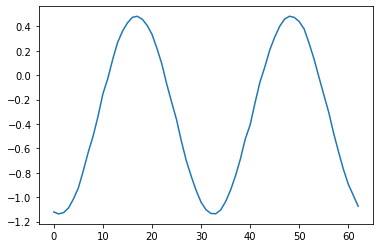

In [46]:
### full angle scan
import matplotlib.pyplot as plt
%matplotlib inline

theta_list = np.arange(0,2*np.pi, 0.1)
# theta_list = np.arange(0.98*np.pi, 1.02*np.pi, 0.001)

E_list = [GIVE_ENERGY(theta) for theta in theta_list]

plt.plot(E_list)
print(min(E_list))

In [47]:
Hamilt.molecule.fci_energy

array(-1.13728383)

# checking with linear alg (exp operator function!)

In [48]:
def Full_Ansatz_and_Quantum_R_circuit(Pn, R_corrected_Op_list, R_correction_list, ancilla_amplitudes, N_system_qubits,  ansatz_circ):
    
    ancilla_obj = prepare_arb_state(ancilla_amplitudes, N_system_qubits)
    ancilla_circ = ancilla_obj.Get_state_prep_Circuit()
    
#     N_ancilla_qubits = ancilla_obj.Get_max_no_ancilla_qubits()
    N_ancilla_qubits = N_ancilla_qubits = int(np.ceil(np.log2(len(ancilla_amplitudes)))) 
    
    ancilla_prep_circ = ancilla_obj.Get_state_prep_Circuit()
    R_circ_obj = LCU_R_gate(N_ancilla_qubits, N_system_qubits, R_corrected_Op_list, R_correction_list, Pn)
    R_circ_circ = cirq.Circuit(
        cirq.decompose_once((R_circ_obj(*cirq.LineQubit.range(R_circ_obj.num_qubits())))))

    
    full_Q_circ = cirq.Circuit([
        *ansatz_circ.all_operations(),
        *ancilla_circ.all_operations(),
        *R_circ_circ.all_operations(),
        *list(ancilla_circ.all_operations())[::-1]
    ])
    return full_Q_circ

$$U_{UCCSD}^{H2}=e^{-i \theta Y_{0} X_{1} X_{2} X_{3}}$$

In [49]:
from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator

def H2_ansatz(theta):
    HF_circ = [cirq.X.on(cirq.LineQubit(0)), cirq.X.on(cirq.LineQubit(1))]
    
    full_exp_circ_obj = full_exponentiated_PauliWord_circuit(QubitOperator('Y0 X1 X2 X3', -1j), theta)
    UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
    full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations()])
    
    return full_circuit
    
H2_ansatz(np.pi)  

0: ───X───Rx(0.5π)───@──────────────────────────────@───Rx(-0.5π)───
                     │                              │
1: ───X───H──────────X───@──────────────────────@───X───H───────────
                         │                      │
2: ───H──────────────────X───@──────────────@───X───H───────────────
                             │              │
3: ───H──────────────────────X───Rz(2.0π)───X───H───────────────────

In [50]:
anti_commuting_sets

{0: [(0.1686889816869329+0j) [Z0 Z1]],
 1: [(0.12062523481381837+0j) [Z0 Z2]],
 2: [(0.12062523481381837+0j) [Z1 Z3]],
 3: [(0.16592785032250768+0j) [Z0 Z3]],
 4: [(0.16592785032250768+0j) [Z1 Z2]],
 5: [(0.174412876106516+0j) [Z2 Z3]],
 6: [(-0.09706626861762624+0j) []],
 7: [(0.171412826394024+0j) [Z1], (0.04530261550868928+0j) [Y0 X1 X2 Y3]],
 8: [(-0.2234315367466397+0j) [Z2], (-0.04530261550868928+0j) [Y0 Y1 X2 X3]],
 9: [(-0.2234315367466397+0j) [Z3], (0.04530261550868928+0j) [X0 Y1 Y2 X3]],
 10: [(0.17141282639402405+0j) [Z0], (-0.04530261550868928+0j) [X0 X1 Y2 Y3]]}

In [51]:
SET_index = 7
N_index = 0
theta = np.pi/3

In [52]:
R_uncorrected, Pn, gamma_l = Get_R_linear_combination(anti_commuting_sets[SET_index], N_index)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)
ansatz_cirq_circuit = H2_ansatz(theta)

Full_Ansatz_and_Quantum_R_circuit(Pn, R_corrected_Op_list, R_corr_list, ancilla_amplitudes, Hamilt.molecule.n_qubits, ansatz_cirq_circuit)

0: ───X──────────────────Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───I──────Y0─────────────────────────
                                    │                                │               │      │
1: ───X──────────────────H──────────X───@────────────────────────@───X───H───────────1*I1───1j*Y1──────────────────────
                                        │                        │                   │      │
2: ───H─────────────────────────────────X───@────────────────@───X───H───────────────┼──────X2─────────────────────────
                                            │                │                       │      │
3: ───H─────────────────────────────────────X───Rz(0.667π)───X───H───────────────────┼──────Y3─────────────────────────
                                                                                     │      │
4: ─── U = 0.3459 rad ───────────────────────────────────────────────────────────────(0)────@─────── U = 0.3459 rad ───

In [53]:
Ansatz_circuit = Full_Ansatz_and_Quantum_R_circuit(Pn, R_corrected_Op_list, R_corr_list, ancilla_amplitudes, Hamilt.molecule.n_qubits, ansatz_cirq_circuit)
Ansatz_operator = Ansatz_circuit.unitary()
Ansatz_operator.shape

(32, 32)

In [54]:
zero_state = np.array([[1],[0]])
initial_state = reduce(np.kron, [zero_state for _ in range(len(Ansatz_circuit.all_qubits()))])

In [55]:
ansatz_ket = Ansatz_operator.dot(initial_state)
ansatz_ket

array([[ 0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j],
       [-5.22224751e-17+0.00000000e+00j],
       [-1.88228852e-17+0.00000000e+00j],
       [-7.08963559e-01-2.04985286e-33j],
       [-4.35754571e-01-7.38841751e-34j],
       [-4.09970572e-33+9.38184172e-17j],
       [-1.47768350e-33-2.87707199e-17j],
       [ 0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+4.09970572e-33j],
       [ 0.00000000e+00+1.47768350e-33j],
       [ 2.61112375e-17+7.38537325e-17j],
       [ 9.41144259e-18+2.66195795

In [56]:
# full_density_matrix = np.outer(ansatz_ket[:,0], ansatz_ket[:,0])
full_density_matrix = np.outer(ansatz_ket, ansatz_ket)

In [57]:
n_qubits = len(Ansatz_circuit.all_qubits())
n_ancilla = int(np.ceil(np.log2(len(ancilla_amplitudes))))
n_system_qubits = n_qubits-n_ancilla

In [58]:
I_system_operator = np.eye((2**n_system_qubits))

In [59]:
ancilla_0_state_list = [zero_state for _ in range(n_ancilla)]
ancilla_0_state = reduce(np.kron, ancilla_0_state_list)
ancilla_0_projector = np.outer(ancilla_0_state, ancilla_0_state)
ancilla_0_projector

array([[1, 0],
       [0, 0]])

In [60]:
POVM_0_ancilla = np.kron(I_system_operator, ancilla_0_projector)
Kraus_Op_0 = POVM_0_ancilla.copy()

In [61]:
term = Kraus_Op_0.dot(full_density_matrix.dot(Kraus_Op_0.transpose().conj()))
projected_density_matrix = term/np.trace(term)
projected_density_matrix.shape

(32, 32)

In [62]:
## Next get partial density matrix over system qubits # aka partial trace!
# https://scicomp.stackexchange.com/questions/27496/calculating-partial-trace-of-array-in-numpy

# reshape to do the partial trace easily using np.einsum
reshaped_dm = projected_density_matrix.reshape([2 ** n_system_qubits, 2 ** n_ancilla,
                                                2 ** n_system_qubits, 2 ** n_ancilla])
reduced_dm = np.einsum('jiki->jk', reshaped_dm)
reduced_dm.shape

(16, 16)

In [63]:
def Get_pauli_matrix(PauliOp, N_system_qubits):
    
    pauliDict={'X':np.array([[0,1],[1,0]]),
          'Y':np.array([[0,-1j],[1j,0]]),
          'Z':np.array([[1,0],[0,-1]]),
          'I': np.eye(2)}
    
    list_Q_nos, list_P_strs = list(zip(*[Paulistrs for Paulistrs, const in PauliOp.terms.items()][0]))

    list_of_ops = []
#     list_of_ops_print=[]
    for i in range(N_system_qubits):
        if i in list_Q_nos:
            index = list_Q_nos.index(i)
            list_of_ops.append(pauliDict[list_P_strs[index]])
#             list_of_ops_print.append('{}{}'.format(list_P_strs[index], i))
        else:
            list_of_ops.append(pauliDict['I'])
#             list_of_ops_print.append('I{}'.format(i))

#     print(list_of_ops_print, 'is', PauliOp)
    matrix = reduce(kron, list_of_ops)

    return matrix

In [64]:
Pn_matrix = Get_pauli_matrix(Pn, Hamilt.molecule.n_qubits)

exp_val = np.trace(reduced_dm.dot(Pn_matrix.todense())).real
print(exp_val*gamma_l)

(0.04647319730860807+0j)


In [66]:
SET_index = 9
N_index = 0
theta = np.pi/3


R_uncorrected, Pn, gamma_l = Get_R_linear_combination(anti_commuting_sets[SET_index], N_index)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)
ansatz_cirq_circuit = H2_ansatz(theta)

Ansatz_circuit = Full_Ansatz_and_Quantum_R_circuit(Pn,
                                  R_corrected_Op_list,
                                  R_corr_list, 
                                  ancilla_amplitudes, 
                                  Hamilt.molecule.n_qubits, 
                                  ansatz_cirq_circuit)

print(Ansatz_circuit)
Ansatz_operator = Ansatz_circuit.unitary()

zero_state = np.array([[1],[0]])
initial_state = reduce(np.kron, [zero_state for _ in range(len(Ansatz_circuit.all_qubits()))])

ansatz_ket = Ansatz_operator.dot(initial_state)

full_density_matrix = np.outer(ansatz_ket, ansatz_ket)

n_qubits = len(Ansatz_circuit.all_qubits())
n_ancilla = int(np.ceil(np.log2(len(ancilla_amplitudes))))
n_system_qubits = n_qubits-n_ancilla


###
I_system_operator = np.eye((2**n_system_qubits))
ancilla_0_state_list = [zero_state for _ in range(n_ancilla)]
ancilla_0_state = reduce(np.kron, ancilla_0_state_list)
ancilla_0_projector = np.outer(ancilla_0_state, ancilla_0_state)
###
#POVM
POVM_0_ancilla = np.kron(I_system_operator, ancilla_0_projector)
Kraus_Op_0 = POVM_0_ancilla.copy()

## POVM measure
term = Kraus_Op_0.dot(full_density_matrix.dot(Kraus_Op_0.transpose().conj()))
projected_density_matrix = term/np.trace(term)


# reshape to do the partial trace 
reshaped_dm = projected_density_matrix.reshape([2 ** n_system_qubits, 2 ** n_ancilla,
                                                2 ** n_system_qubits, 2 ** n_ancilla])
reduced_dm = np.einsum('jiki->jk', reshaped_dm)
Pn_matrix = Get_pauli_matrix(Pn, n_system_qubits)

print('')
print(Pn)
print('')

exp_val = np.trace(reduced_dm.dot(Pn_matrix.todense())).real
print(exp_val*gamma_l)

0: ───X─────────────────Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───I──────X0────────────────────────
                                   │                                │               │      │
1: ───X─────────────────H──────────X───@────────────────────────@───X───H───────────I──────Y1────────────────────────
                                       │                        │                   │      │
2: ───H────────────────────────────────X───@────────────────@───X───H───────────────I──────Y2────────────────────────
                                           │                │                       │      │
3: ───H────────────────────────────────────X───Rz(0.667π)───X───H───────────────────1*I3───1j*Y3─────────────────────
                                                                                    │      │
4: ─── U = 1.264 rad ───────────────────────────────────────────────────────────────(0)────@─────── U = 1.264 rad ───

1 [Z3]

(0.07248255248491615+0j)


In [ ]:
np.einsum('jiki->jk', reshaped_dm).shape

In [ ]:
np.einsum('ijik->jk', reshaped_dm).shape

In [ ]:
from quchem.Ansatz_Generator_Functions import *
from numpy import kron
from functools import reduce

pauliDict={'X':np.array([[0,1],[1,0]]),
          'Y':np.array([[0,-1j],[1j,0]]),
          'Z':np.array([[1,0],[0,-1]]),
          'I': np.eye(2)}


n_electrons=2
n_qubits=4

ansatz_obj = Ansatz(n_electrons, n_qubits)
ansatz_obj.Get_JW_HF_state()

HF_reference_ket= ansatz_obj.Get_JW_HF_state().reshape([len(ansatz_obj.Get_JW_HF_state()), 1])


list_of_ops = [pauliDict[term[0]] for term in 'Y0 X1 X2 X3'.split(' ')]
matrix = reduce(kron, list_of_ops) *-1j #NOTE NEED TO MULTIPLY BY THIS!

import scipy

ansatz_state_ket = scipy.sparse.linalg.expm_multiply(theta*matrix, HF_reference_ket)
ansatz_state_ket

R is defined as:

$$R=\exp (-i \alpha \mathcal{X} / 2)$$

$$\mathcal{X} =i \sum_{k=1}^{n-1} \delta_{k} P_{k} P_{n} = i \sum_{k=1}^{n-1} \delta_{k} P_{kn}$$

In [ ]:
print('NOTE: YZ = iX ... and ... ZY = -iX ')
X_DICT

In [ ]:
print(X_DICT['H_n'])
print('should equal')
print(np.sin(X_DICT['phi_n_1']), '*',X_DICT['H_n_1'],' + ', np.cos(X_DICT['phi_n_1']),  '*',X_DICT['P_n'])

In [ ]:
S_INDEX= 0 #<-- 0/1 is variable here!!!
set_index = 10

N_system_qubits = 4
X_DICT = Get_X_SET(anti_commuting_sets[set_index], S_INDEX) # <-- 0/1 is variable here!!!

if np.cos(X_DICT['phi_n_1'])<0:
    FACTOR = -1
else:
    FACTOR = 1

if list(X_DICT['P_n'].terms.values())[0]<0:
    PnFACTOR = -1
else:
    PnFACTOR = 1
####

alpha = X_DICT['phi_n_1']
P_n = X_DICT['P_n']


list_of_X_qNos=[]
list_of_X_ops=[]
constants=[]
for qubitOp in X_DICT['X_PauliWords']:
    for qubit_no_pauli, const in qubitOp.terms.items():
        qubitNo,PauliStr = list(zip(*qubit_no_pauli))
        list_of_X_ops.append(PauliStr)
        list_of_X_qNos.append(qubitNo)
        constants.append(const)


list_of_X_ops_matrices =[]
for X_op_list in list_of_X_ops:
    list_of_X_ops_matrices.append([pauliDict[PauliStr] for PauliStr in X_op_list])
    

kron_list_of_X_ops =[constants[index]*reduce(kron, X_op_list_matrices) for index, X_op_list_matrices in enumerate(list_of_X_ops_matrices)]

X_OP_SUM = reduce(np.add, kron_list_of_X_ops)

R_operator = scipy.sparse.linalg.expm(-1j*alpha/2*X_OP_SUM)

post_R_state = np.dot(R_operator, ansatz_state_ket)
post_R_state

In [ ]:
change_basis_dict ={
    'X':cirq.ry(-np.pi / 2)._unitary_(),
    'Y':cirq.rx(np.pi / 2)._unitary_(),
    'Z': np.eye(2),
    'I': np.eye(2)}


In [ ]:
list_of_Pn_qNos,list_of_Pn_ops = list(zip(*[Paulistrs for Paulistrs, const in P_n.terms.items()][0]))

list_of_Pn_qNos = np.array(list_of_Pn_qNos)
all_qubit_Nos = np.arange(0,N_system_qubits-1)

common_qubits = np.intersect1d(list_of_Pn_qNos, all_qubit_Nos)

missing_qubitNos = [i for i in all_qubit_Nos if i not in common_qubits]

Pn_ops=[]
for qNo in range(N_system_qubits):
    if qNo in list_of_Pn_qNos:
        index = list_of_Pn_qNos.tolist().index(qNo)
        Pn_ops.append(list_of_Pn_ops[index])
    else:
        Pn_ops.append('I')
print(Pn_ops)

Change_basis_Pn_ops = [change_basis_dict[term] for term in Pn_ops]
Change_basis_Pn_MATRIX = reduce(kron, Change_basis_Pn_ops)

In [ ]:
final_state = np.dot(Change_basis_Pn_MATRIX, post_R_state)
print(final_state)

In [ ]:
# for i in range(N_system_qubits**2):
#     print('probability of getting state:', Get_state_as_str(N_system_qubits, i), np.absolute(final_state[i][0])**2)

output_dict={}
for i in range(N_system_qubits**2):
    output_dict[Get_state_as_str(N_system_qubits, i)] = int(1000*np.absolute(final_state[i][0])**2)
output_dict

In [ ]:
print(P_n)

m_dict={}
for state in output_dict:
    state_measured = np.take([bit for bit in state], list_of_Pn_qNos.tolist()) # selects qubit indices measured!
    new_str = ''.join(state_measured)
    if new_str in m_dict.keys():
        m_dict[new_str] += output_dict[state]
    else:
        m_dict[new_str] = output_dict[state]


print(m_dict)
print(' ')
print(FACTOR,'*', PnFACTOR)
expectation_value_by_parity(m_dict)

## something wrong!!!!!!
- should get same outputs!

In [ ]:
S_INDEX= 1 #<-- 0/1 is variable here!!!
set_index = 10

N_system_qubits = 4
X_DICT = Get_X_SET(anti_commuting_sets[set_index], S_INDEX) # <-- 0/1 is variable here!!!

# if np.cos(X_DICT['phi_n_1'])<0:
#     FACTOR = -1
# else:
#     FACTOR = 1


if list(anti_commuting_sets[set_index][S_INDEX].terms.values())[0]<0:
    FACTOR = -1
else:
    FACTOR = 1
####

alpha = X_DICT['phi_n_1']
P_n = X_DICT['P_n']

list_of_X_qNos,list_of_X_ops = list(zip(*[Paulistrs for qubitOp in X_DICT['X_PauliWords'] for Paulistrs, const in qubitOp.terms.items()][0]))

list_of_X_constants = [const for qubitOp in X_DICT['X_PauliWords'] for Paulistrs, const in qubitOp.terms.items()]

list_of_X_qNos = np.array(list_of_X_qNos)
all_qubit_Nos = np.arange(0,N_system_qubits-1)

common_qubits = np.intersect1d(list_of_X_qNos, all_qubit_Nos)

missing_qubitNos = [i for i in all_qubit_Nos if i not in common_qubits]

X_ops=[]
X_sign =[]
for qNo in range(N_system_qubits):
    if qNo in list_of_X_qNos:
        index = list_of_X_qNos.tolist().index(qNo)
        X_ops.append(list_of_X_ops[index])
        X_sign.append(list_of_X_constants[0])
    else:
        X_ops.append('I')
        X_sign.append(1)

print('X = 1i *', X_DICT['H_n_1'], '* (', P_n, ')')
print('')  
print('NOTE: YZ = iX ... and ... ZY = -iX ')
print('')
print('X =', X_ops, list_of_X_constants[0], X_sign)

list_of_X_ops_matrices = [pauliDict[term] for i, term in enumerate(X_ops)]
X_matrix = reduce(kron, list_of_X_ops_matrices)
SIGN = reduce(np.multiply, list_of_X_constants)
post_R_state = scipy.sparse.linalg.expm_multiply(-1j*SIGN*alpha/2*X_matrix, ansatz_state_ket)
post_R_state

list_of_Pn_qNos,list_of_Pn_ops = list(zip(*[Paulistrs for Paulistrs, const in P_n.terms.items()][0]))

list_of_Pn_qNos = np.array(list_of_Pn_qNos)
all_qubit_Nos = np.arange(0,N_system_qubits-1)

common_qubits = np.intersect1d(list_of_Pn_qNos, all_qubit_Nos)

missing_qubitNos = [i for i in all_qubit_Nos if i not in common_qubits]

Pn_ops=[]
for qNo in range(N_system_qubits):
    if qNo in list_of_Pn_qNos:
        index = list_of_Pn_qNos.tolist().index(qNo)
        Pn_ops.append(list_of_Pn_ops[index])
    else:
        Pn_ops.append('I')
print(Pn_ops)

Change_basis_Pn_ops = [change_basis_dict[term] for term in Pn_ops]
Change_basis_Pn_MATRIX = reduce(kron, Change_basis_Pn_ops)

final_state = np.dot(Change_basis_Pn_MATRIX, post_R_state)
print(final_state)

print(P_n)

output_dict={}
for i in range(N_system_qubits**2):
    output_dict[Get_state_as_str(N_system_qubits, i)] = int(1000*np.absolute(final_state[i][0])**2)

m_dict={}
for state in output_dict:
    state_measured = np.take([bit for bit in state], list_of_Pn_qNos.tolist()) # selects qubit indices measured!
    new_str = ''.join(state_measured)
    if new_str in m_dict.keys():
        m_dict[new_str] += output_dict[state]
    else:
        m_dict[new_str] = output_dict[state]

print('')
print(SIGN, FACTOR)
expectation_value_by_parity(m_dict)